In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.colors as mcolors
import cmcrameri.cm as cmc
from tqdm import tqdm

# --- Parameters ---
num_fils = 309
num_segs = 20
num_steps = 500

# --- File Paths ---
seg_file_path_1 = f'../data/emergent_random_1/20250717/ciliate_309fil_9000blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_seg_states.dat'
phase_file_path_1 = f'../data/emergent_random_1/20250717/ciliate_309fil_9000blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_true_states.dat'

seg_file_path_2 = f'../data/emergent_random_2/20250717/ciliate_309fil_9000blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_seg_states.dat'
phase_file_path_2 = f'../data/emergent_random_2/20250717/ciliate_309fil_9000blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_true_states.dat'

seg_file_path_3 = f'../data/emergent_random_3/20250717/ciliate_309fil_9000blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_seg_states.dat'
phase_file_path_3 = f'../data/emergent_random_3/20250717/ciliate_309fil_9000blob_8.00R_0.1500torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_true_states.dat'

# --- Load Data for all three simulations ---
seg_data_1 = np.loadtxt(seg_file_path_1)
phase_data_1 = np.loadtxt(phase_file_path_1)

seg_data_2 = np.loadtxt(seg_file_path_2)
phase_data_2 = np.loadtxt(phase_file_path_2)

seg_data_3 = np.loadtxt(seg_file_path_3)
phase_data_3 = np.loadtxt(phase_file_path_3)

In [2]:
# --- Process Data ---
time_1 = seg_data_1[:, 0] / num_steps
num_steps_1 = len(time_1)

time_2 = seg_data_2[:, 0] / num_steps
num_steps_2 = len(time_2)

time_3 = seg_data_3[:, 0] / num_steps
num_steps_3 = len(time_3)

# Reshape segment data: (time, num_fils, num_segs, 3)
seg_positions_1 = seg_data_1[:, 1:].reshape(num_steps_1, num_fils, num_segs, 3)
seg_positions_2 = seg_data_2[:, 1:].reshape(num_steps_2, num_fils, num_segs, 3)
seg_positions_3 = seg_data_3[:, 1:].reshape(num_steps_3, num_fils, num_segs, 3)

# Extract phases: (time, num_fils)
phases_1 = np.mod(phase_data_1[:, 2:num_fils+2], 2*np.pi)
phases_2 = np.mod(phase_data_2[:, 2:num_fils+2], 2*np.pi)
phases_3 = np.mod(phase_data_3[:, 2:num_fils+2], 2*np.pi)

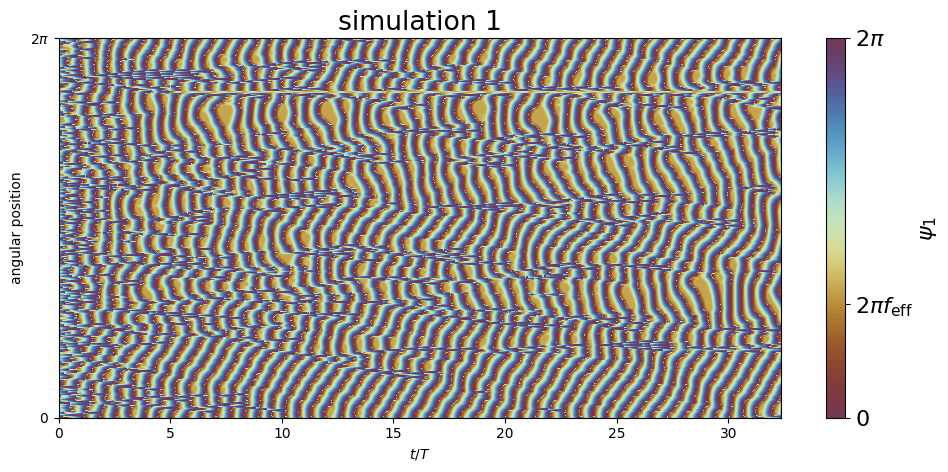

In [6]:
# --- Create Kymograph for Simulation 1 ---
fig, ax = plt.subplots(figsize=(10, 5))
plt.rcParams.update({
    "font.size": 16
})

position = np.linspace(0, 2*np.pi, num_fils)
xx, yy = np.meshgrid(time_1, position)

im = ax.contourf(xx, yy, phases_1.T, cmap=cmc.romaO, levels=np.linspace(0, 2*np.pi, 100))

cbar = fig.colorbar(im, ax=ax)
cbar.set_label(r'$\psi_1$')
cbar.set_ticks([0, 0.6*np.pi, 2*np.pi])
cbar.set_ticklabels([r'$0$', r'$2\pi f_{\mathrm{eff}}$', r'$2\pi$'])

ax.set_xlabel(r'$t/T$')
ax.set_ylabel('angular position')
ax.set_title('simulation 1')
ax.set_yticks([0, 2*np.pi])
ax.set_yticklabels([r'$0$', r'$2\pi$'])

plt.tight_layout()
plt.show()
plt.rcParams.update(plt.rcParamsDefault)

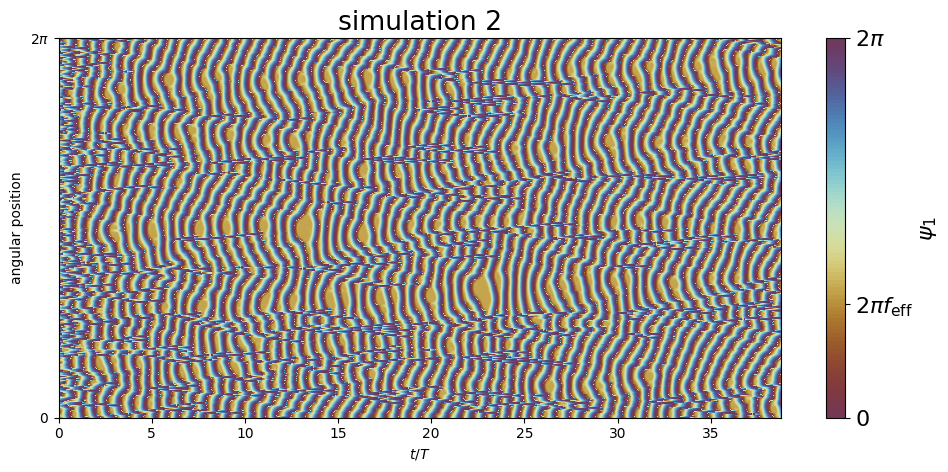

In [9]:
# --- Create Kymograph for Simulation 2 ---
fig, ax = plt.subplots(figsize=(10, 5))
plt.rcParams.update({
    "font.size": 16
})

position = np.linspace(0, 2*np.pi, num_fils)
xx, yy = np.meshgrid(time_2, position)

im = ax.contourf(xx, yy, phases_2.T, cmap=cmc.romaO, levels=np.linspace(0, 2*np.pi, 100))

cbar = fig.colorbar(im, ax=ax)
cbar.set_label(r'$\psi_1$')
cbar.set_ticks([0, 0.6*np.pi, 2*np.pi])
cbar.set_ticklabels([r'$0$', r'$2\pi f_{\mathrm{eff}}$', r'$2\pi$'])

ax.set_xlabel(r'$t/T$')
ax.set_ylabel('angular position')
ax.set_title('simulation 2')
ax.set_yticks([0, 2*np.pi])
ax.set_yticklabels([r'$0$', r'$2\pi$'])

plt.tight_layout()
plt.show()
plt.rcParams.update(plt.rcParamsDefault)

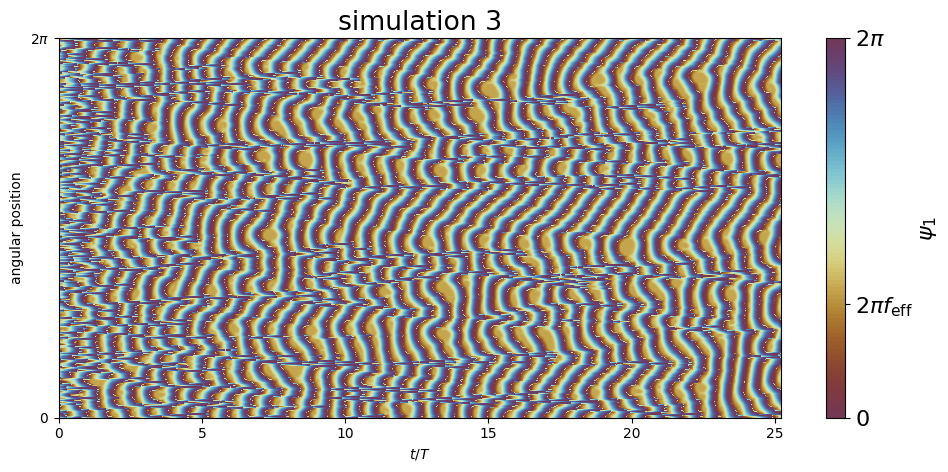

In [10]:
# --- Create Kymograph for Simulation 3 ---
fig, ax = plt.subplots(figsize=(10, 5))
plt.rcParams.update({
    "font.size": 16
})

position = np.linspace(0, 2*np.pi, num_fils)
xx, yy = np.meshgrid(time_3, position)

im = ax.contourf(xx, yy, phases_3.T, cmap=cmc.romaO, levels=np.linspace(0, 2*np.pi, 100))

cbar = fig.colorbar(im, ax=ax)
cbar.set_label(r'$\psi_1$')
cbar.set_ticks([0, 0.6*np.pi, 2*np.pi])
cbar.set_ticklabels([r'$0$', r'$2\pi f_{\mathrm{eff}}$', r'$2\pi$'])

ax.set_xlabel(r'$t/T$')
ax.set_ylabel('angular position')
ax.set_title('simulation 3')
ax.set_yticks([0, 2*np.pi])
ax.set_yticklabels([r'$0$', r'$2\pi$'])

plt.tight_layout()
plt.show()
plt.rcParams.update(plt.rcParamsDefault)